#### CS 6316 : Machine Learning
## In-class activity: K-Nearest Neighbor Algorithm

In this activity, you will further explore KNN algorithm through python code.

The data set we’ll be using is the Iris Flower Dataset (IFD) which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals. Our goal is to train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.

Lets start by running an example code using scikit-learn to train a KNN classifier and evaluate its performance on the data set.
There is 4 step modeling pattern:

1. Import the learning algorithm
2. Instantiate the model
3. Learn the model
4. Predict the response


The following steps will print out accuracy score for K=3:

In [77]:
# 1) loading libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# loading training data
df = pd.read_csv('iris.data.txt', header=None, names=names)
df.head()

# making our predictions 
predictions = []

# create design matrix X and target vector y
X = np.array(df.ix[:, 0:4])     # end index is exclusive
y = np.array(df['class'])   # another way of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_test)

[[ 6.1  2.8  4.7  1.2]
 [ 5.7  3.8  1.7  0.3]
 [ 7.7  2.6  6.9  2.3]
 [ 6.   2.9  4.5  1.5]
 [ 6.8  2.8  4.8  1.4]
 [ 5.4  3.4  1.5  0.4]
 [ 5.6  2.9  3.6  1.3]
 [ 6.9  3.1  5.1  2.3]
 [ 6.2  2.2  4.5  1.5]
 [ 5.8  2.7  3.9  1.2]
 [ 6.5  3.2  5.1  2. ]
 [ 4.8  3.   1.4  0.1]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.1  3.8  1.5  0.3]
 [ 6.3  3.3  4.7  1.6]
 [ 6.5  3.   5.8  2.2]
 [ 5.6  2.5  3.9  1.1]
 [ 5.7  2.8  4.5  1.3]
 [ 6.4  2.8  5.6  2.2]
 [ 4.7  3.2  1.6  0.2]
 [ 6.1  3.   4.9  1.8]
 [ 5.   3.4  1.6  0.4]
 [ 6.4  2.8  5.6  2.1]
 [ 7.9  3.8  6.4  2. ]
 [ 6.7  3.   5.2  2.3]
 [ 6.7  2.5  5.8  1.8]
 [ 6.8  3.2  5.9  2.3]
 [ 4.8  3.   1.4  0.3]
 [ 4.8  3.1  1.6  0.2]
 [ 4.6  3.6  1.   0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 6.7  3.1  4.4  1.4]
 [ 4.8  3.4  1.6  0.2]
 [ 4.4  3.2  1.3  0.2]
 [ 6.3  2.5  5.   1.9]
 [ 6.4  3.2  4.5  1.5]
 [ 5.2  3.5  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.2  4.1  1.5  0.1]
 [ 5.8  2.7  5.1  1.9]
 [ 6.   3.4  4.5  1.6]
 [ 6.7  3.1  4.7  1.5]
 [ 5.4  3.9

Now try traininging and comparing performances for different k values (from 1 to 50).

In [78]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cross validation scores
cv_scores = []

# perform 10-fold cross validation we are already familiar with
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

In [79]:
# Let's try to discover what is the best value of k
# Run the following cell to show the table

In [80]:
print ("k          Score          MSE")
for i in range(len(neighbors)):
    print ('%d          %.5f          %.5f' % (neighbors[i], cv_scores[i], MSE[i]))

k          Score          MSE
1          0.94253          0.05747
3          0.94328          0.05672
5          0.95162          0.04838
7          0.95253          0.04747
9          0.94419          0.05581
11          0.94253          0.05747
13          0.93419          0.06581
15          0.94253          0.05747
17          0.94253          0.05747
19          0.94253          0.05747
21          0.94253          0.05747
23          0.93141          0.06859
25          0.95051          0.04949
27          0.91212          0.08788
29          0.90919          0.09081
31          0.89101          0.10899
33          0.90010          0.09990
35          0.90919          0.09081
37          0.90010          0.09990
39          0.89177          0.10823
41          0.90288          0.09712
43          0.89177          0.10823
45          0.88268          0.11732
47          0.88268          0.11732
49          0.87157          0.12843


What is the optimal value of K?

Write your answer here: 7
(Double-click cell to edit)


Lets make a plot to visually compare performances at each k value.

The optimal number of neighbors is 7


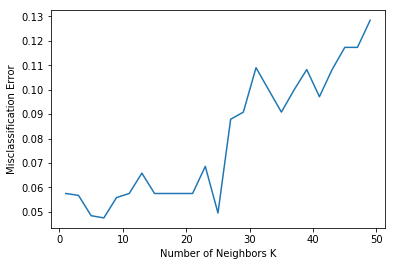

In [81]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

We can confirm that the optimal value of K (see above)

Now, we are going to implement KNN prediction from scratch.


Note that KNN is a instance-based learning, which means that our algorithm doesn’t explicitly learn a model. Instead, it chooses to memorize the training instances which are subsequently used as “knowledge” for the prediction phase. Concretely, this means that only when a query to our database is made (i.e. when we ask it to predict a label given an input), will the algorithm use the training instances to spit out an answer.

In our implementation, the training block reduces to just memorizing the training data.
This mean it just returns.

In [82]:
def train(X_train, y_train):
    # do nothing 
    return


The minimal training phase of KNN comes both at a memory cost, since we must store a potentially huge data set, as well as a computational cost during test time since classifying a given observation requires a run down of the whole data set. Practically speaking, this is undesirable since we usually want fast responses.


Now you are going to fill in some missing lines in predict phase. Here is general workflow:
1. Compute the euclidean distance between the “new” observation and all the data points in the training set.
2. Select the K nearest ones and perform a majority vote.
3. Assigns the corresponding label to the observation.

In [83]:
from collections import Counter

def predict(X_train, y_train, x_test, k):
    # create list for distances and targets
    distances = []
    targets = []
    for i in range(len(X_train)):
        # first we compute the Euclidean distance
        # (use x_test and X_train[i, :]. Also, where appropriate, you can use np.sqrt, np.square, and np.sum...)
        distance = np.sqrt(np.sum(pow(X_train[i, :]-X_test, 2)))
        # add it to list of distances
        distances.append([distance, i])

    # sort the list
    distances = sorted(distances)

    # make a list of the k neighbors' targets
    for i in range(k):
        # (Hint: index receives particular value in distances[something][something])
        index = distances[i][0]
        # (Hint: use y_train and index below)
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

print(predict(X_train, y_train, X_test, 7))

Iris-versicolor


C:\Users\Bryan\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Lets test our implementation, using the predict() method.

*** NOTE: Fill in "optimalK" below

In [84]:
from sklearn.metrics import accuracy_score

def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # train on the input data
    train(X_train, y_train)

    # loop over all observations
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))
        
# making our predictions 
# Using the optimal value of K discovered above
predictions = []
try:
    optimalK = 7 # Add your answer here (and delete line!)
    kNearestNeighbor(X_train, y_train, X_test, predictions, optimalK)
    predictions = np.asarray(predictions)

    # evaluating accuracy
    accuracy = accuracy_score(y_test, predictions) * 100
    print('\nThe accuracy of OUR classifier is %d%%' % accuracy)

except ValueError:
    print('Can\'t have more neighbors than training samples!!') # Need to be careful about value of k

C:\Users\Bryan\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



The accuracy of OUR classifier is 30%


#### Please turn in your work in pdf format by clicking "File/download as/pdf".